In [84]:
import numpy as np
import pandas as pd
from scipy import stats
import operator
import timeit
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot 
from scipy.stats import chi2_contingency
import timeit
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

In [9]:
start = timeit.default_timer()

DnB_F=pd.read_csv('D:/Xiaoxi/ModelC/Dataset/Model_Transactions_201807_PPSS_deduped_modelc.csv')
DnB_F.head()
DnB_F=pd.DataFrame(DnB_F)

stop = timeit.default_timer()
print ('runing time:',round((stop - start)/60,2),'mins')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


runing time: 1.53 mins


In [10]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)
# change the format to pring in % 

# pd.options.display.float_format = None

pd.options.display.float_format = '{:20,.4f}'.format

In [17]:
len(DnB_F)

1943757

In [18]:
len(DnB_F.columns)  # 100 columns

289

In [129]:
col_y = ['QUALITY_RESPONSECOUNT']  

# Copy the dataset
DnB_F1=DnB_F.copy()

len(DnB_F1)

1943757

In [130]:
DnB_F1['tr_year'] = pd.DatetimeIndex(DnB_F1['Date']).year
DnB_F1['tr_month'] = pd.DatetimeIndex(DnB_F1['Date']).month
DnB_F1['tr_day'] = pd.DatetimeIndex(DnB_F1['Date']).day

## ADDRESS_TYPE

In [21]:
df_m=DnB_F.copy()

### PRACTICE  MAILING TU HOME3
df_m[['ADDRESS_TYPE']]=df_m[['ADDRESS_TYPE']].fillna(0)  # try to see how many NA exist bussiness name>1

pd.concat([pd.crosstab( df_m.ADDRESS_TYPE,df_m.QUALITY_RESPONSECOUNT),
           pd.crosstab( df_m.ADDRESS_TYPE,df_m.QUALITY_RESPONSECOUNT).apply(lambda r: r/r.sum(), axis=1)[[1]]        
          ],axis=1)

QUALITY_RESPONSECOUNT,0,1,1
ADDRESS_TYPE,,,
0,110807,293,0.0026
CPA BUSINESS,24760,43,0.0017
FA BUSINESS,83197,579,0.0069
Mailing,1234937,1822,0.0015
PRACTICE,20852,4,0.0002
Practice,465856,607,0.0013


In [131]:
# ONLY     SELECT ADDRESS_TYPE='PRACTICE','Practice','Mailing','TU HOME3'

DnB_F1=DnB_F1[DnB_F1['ADDRESS_TYPE'].isin(['PRACTICE','Practice','Mailing','TU HOME3','FA BUSINESS','CPA BUSINESS'])]

DnB_F1=DnB_F1[DnB_F1['SPECIALTY'].isin(['PRIMARY','SECONDARY','BHG PRO'])]

DnB_F1['ADDRESS_TYPE'].replace('PRACTICE','Practice',inplace=True)

len(DnB_F1)

1693341

In [132]:
pd.crosstab( DnB_F1['ADDRESS_TYPE'],DnB_F1['MODEL'])

MODEL,C1,C2
ADDRESS_TYPE,,
CPA BUSINESS,3,24799
FA BUSINESS,82,83304
Mailing,204139,927730
Practice,132411,320873


In [133]:
DnB_F1['MODEL'][DnB_F1['MODEL']=='C1'].count()/DnB_F1['MODEL'].count()

0.19879929677483743

In [134]:
DnB_F1['MODEL'][DnB_F1['MODEL']=='C2'].count()

1356706

In [39]:
pd.concat([pd.crosstab( DnB_F1[DnB_F.QUALITY_RESPONSECOUNT==1].ADDRESS_TYPE,DnB_F1.FUND_CNT),
           pd.crosstab( DnB_F1[DnB_F.QUALITY_RESPONSECOUNT==1].ADDRESS_TYPE,DnB_F1.FUND_CNT).apply(lambda r: r/r.sum(), axis=1)[[1]]  
            ],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


FUND_CNT,0,1,1
ADDRESS_TYPE,,,
CPA BUSINESS,39,4,0.0930
FA BUSINESS,559,20,0.0345
Mailing,1548,274,0.1504
Practice,519,92,0.1506


In [40]:
pd.concat([pd.crosstab( DnB_F1.ADDRESS_TYPE,DnB_F1.QUALITY_RESPONSECOUNT),
           pd.crosstab( DnB_F1.ADDRESS_TYPE,DnB_F1.QUALITY_RESPONSECOUNT).apply(lambda r: r/r.sum(), axis=1)[[1]]  
            ],axis=1)

QUALITY_RESPONSECOUNT,0,1,1
ADDRESS_TYPE,,,
CPA BUSINESS,24760,43,0.0017
FA BUSINESS,83197,579,0.0069
Mailing,1234937,1822,0.0015
Practice,486708,611,0.0013


In [206]:
def Region(series):
  
    if series in (['CA','NV','UT','CO','WY','ID','MT','WA','OR','AK','HI']):
        return 'west'
    elif series in(['AZ','NM','TX','OK']):
        return 'southwest'    
    elif series in (['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH']):
        return 'midwest'
    elif series in (['MD','PA','NY','NJ','CT','RI','MA','NH','VT','ME']):
        return 'northeast'
    elif series in (['AR','LA','MS','AL','TN','KY','GA','FL','SC','NC','VA','DC','WV','DE']):
        return 'southeast'


In [207]:
DnB_F1['Region'] = DnB_F1['State'].apply(Region)
DnB_F1['Region'].value_counts()

southeast    421073
northeast    402497
midwest      377849
west         310625
southwest    181294
Name: Region, dtype: int64

## Medical_title--------------------------------------------------------------------------

In [192]:
def Medical_title(series):
  
    if series in (['DO','DPM','OD']):
        return 'MD'
    elif series in (['DMD','DN','DENT']):
        return 'DDS'
    elif series in(['DVM','VMD','VET']):
        return 'VET'
    elif series in (['APRN','LPN','TRN']):
        return 'RN'
    elif series in (['PharmD','PHARMD']):
        return 'RPH'
    elif series in (['ANP','ARNP','CNP','CPNP','CRNP','FNP','GNP','PNP','WHNP']):
        return 'NP'
    elif series in (['PAC']):
        return 'PA'  
    elif series in (['ND']):
        return 'DC'
    elif series in (['PSO']):
        return 'PSYD'
    else:
        return series

In [193]:
DnB_F1['MedicalTitleGroup'] = DnB_F1['MedicalTitle'].apply(Medical_title)
DnB_F1['MedicalTitleGroup'].value_counts()

MD      777724
NP      191990
RPH     186307
DDS     177947
FA       82743
PA       71003
PT       65770
SLP      60964
CPA      25406
OT       19143
CRNA     17836
VET       8033
RDH       7900
PHD        265
PSYD       143
IA         117
PsyD        34
RN           7
ATY          5
DPSM         2
CFO          1
LCP          1
Name: MedicalTitleGroup, dtype: int64

In [195]:
def Medical_title_group_reduce(series):
  
    if series in (['MD']):
        return 'MD'
    elif series in(['NP']):
        return 'NP'    
    elif series in (['RPH']):
        return 'RPH'
    elif series in (['DDS']):
        return 'DDS'
    elif series in (['FA']):
        return 'FA'
    elif series in (['PA']):
        return 'PA'  
    elif series in (['PT']):
        return 'PT'    
    elif series in (['SLP']):
        return 'SLP'
    elif series in (['CPA']):
        return 'CPA'  
    elif series in (['OT']):
        return 'OT'
    elif series in (['CRNA']):
        return 'CRNA'
    else:
        return 'OTHER'

In [196]:
DnB_F1['MedicalTitleGroup_r'] = DnB_F1['MedicalTitleGroup'].apply(Medical_title_group_reduce)
DnB_F1['MedicalTitleGroup_r'].value_counts()

MD       777724
NP       191990
RPH      186307
DDS      177947
FA        82743
PA        71003
PT        65770
SLP       60964
CPA       25406
OT        19143
CRNA      17836
OTHER     16508
Name: MedicalTitleGroup_r, dtype: int64

## Medical_title------------------------------------------Ends --------------------------------

In [139]:
def Recode3(series):
  
    if series <=2:
        return series
    elif series >2:
        return 

In [140]:
def Recode4(series):
  
    if series <=3:
        return series
    elif series >3:
        return 4

In [141]:
def Recode5(series):
  
    if series <=4:
        return series
    elif series >4:
        return 5

In [184]:
def Recode7(series):
  
    if series <=6:
        return series
    elif series >6:
        return 7

In [185]:
DnB_F1['Num_Business_r']=DnB_F1['Num_Business'].apply(Recode3)
DnB_F1['Num_Home_r']=DnB_F1['Num_Home'].apply(Recode3)
DnB_F1['SENT_3MO_r']=DnB_F1['SENT_3MO'].apply(Recode3)
DnB_F1['SENT_6MO_r']=DnB_F1['SENT_6MO'].apply(Recode4)
DnB_F1['SENT_12MO_r']=DnB_F1['SENT_12MO'].apply(Recode5)
DnB_F1['SENT_18MO_r']=DnB_F1['SENT_18MO'].apply(Recode5)
DnB_F1['SENT_24MO_r']=DnB_F1['SENT_24MO'].apply(Recode5)
DnB_F1['Total_Sent_Practitioner_r']=DnB_F1['Total_Sent_Practitioner'].apply(Recode7)
DnB_F1['Total_Sent_Site_r']=DnB_F1['Total_Sent_Site'].apply(Recode7)


In [144]:
# Create category and continous variable for MODEL

col_categ=[
'MedicalTitle',
'MedicalTitleGroup_r',
'SPECIALTY',
'TU_GROUP',
'Previous_TU_GROUP',
'Decile',
'ADDRESS_TYPE',
'Site_type',
#'SiteFirstUse',
'State',
#'Date',
#'LastTransactionDate',
#'LastTransaction_Days',
#'MailOrder',
#'Total_SENT_Month',
'NEWTU',
#'Shipping',
#'Product',
#'Sent',
#'RFL',
'Bad_Data',
#'Non_HealthCare',
'MODEL',
'New_Practitioner',
'New_Site',
]


In [145]:
col_contin=[
'Num_Home',
'Num_Business',
'Total_Sent_Practitioner',
'Total_Sent_Site',
'SENT_3MO',
'SENT_6MO',
'SENT_12MO',
'SENT_18MO',
'SENT_24MO'
 ]

# Table

In [146]:
# Copy the dataset
DnB_F2=DnB_F1.copy()

In [147]:
DnB_F_pull=DnB_F2[DnB_F2.QUALITY_RESPONSECOUNT==1]

In [148]:
DnB_F_margin=DnB_F2[DnB_F2.FUND_CNT==1]

In [150]:
print('Total Count: ',DnB_F1['PID'].count())
print('QResponse Count',DnB_F1[DnB_F1.QUALITY_RESPONSECOUNT==1]['PID'].count())
print('Pullthrough Count',DnB_F1[DnB_F1.FUND_CNT==1]['PID'].count())
print('Response rate:',DnB_F1[DnB_F1.QUALITY_RESPONSECOUNT==1]['PID'].count()/DnB_F1['PID'].count())
print('Pullthrough rate:',DnB_F1[DnB_F1.FUND_CNT==1]['PID'].count()/DnB_F1[DnB_F1.QUALITY_RESPONSECOUNT==1]['PID'].count())
print('Average margin:',DnB_F1['NEWMARGIN'].mean())

Total Count:  1693341
QResponse Count 2756
Pullthrough Count 376
Response rate: 0.00162755168628
Pullthrough rate: 0.136429608128
Average margin: 2.6320984760895776


### 2017.1-2018.7 
#### Average Response: 2756/1,693,341 = 0.1627%
#### Average Pullthrough 376/2756 = 13.64%
#### Average Revenue 2.63


In [156]:
DnB_F1_c[DnB_F1_c.QUALITY_RESPONSECOUNT==1].to_csv('D:/Xiaoxi/ModelC/Dataset/csv/response.csv')

In [151]:
pd.crosstab( pd.qcut(DnB_F1['NEWMARGIN'],q=1000,duplicates='drop'),DnB_F1.FUND_CNT,dropna=False)

FUND_CNT,0,1
NEWMARGIN,,
"(-5586.136, 0.0]",1692965,20
"(0.0, 85873.663]",0,356


In [152]:
pd.crosstab( DnB_F1.QUALITY_RESPONSECOUNT,DnB_F1.FUND_CNT)

FUND_CNT,0,1
QUALITY_RESPONSECOUNT,,
0,1690577,8
1,2388,368


In [153]:
def table (variable):

    table= pd.concat([pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, DnB_F1[variable],dropna=False),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, DnB_F1[variable],dropna=False).apply(lambda r: r/r.sum(), axis=1),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, DnB_F1[variable],dropna=False).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_pull.FUND_CNT, DnB_F1[variable],dropna=False).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_margin.FUND_CNT, DnB_F1[variable],values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean,dropna=False),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, DnB_F1[variable],dropna=False).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_pull.FUND_CNT, DnB_F1[variable]).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_margin.FUND_CNT, DnB_F1[variable],values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean)],
                      
                     keys=['Counts', 'Row Percent of Counts','QR rate','Pullthrough rate',' Average Margin','Revenue']
                      )
     
    return round(table,4)

In [154]:
def plot_table (variable):  
    names = list(table(variable).columns.values)
    names_label=[str(x) for x in names]
    values0 =list(table(variable).iloc[0,:]+table(variable).iloc[1,:])
    values_re=list(table(variable).iloc[7,:])
    value_qr=list(table(variable).iloc[4,:])
    value_pt=list(table(variable).iloc[5,:])
    df=pd.DataFrame({'Count':values0,'Revenue':values_re,'QRate':value_qr,'Pull':value_pt})
    df.fillna(0, inplace=True)


    fig = plt.figure(figsize=(12,8))
   
    ax=plt.subplot(2, 1, 1)
    df.iloc[:,0].plot(kind='area',label='Total Send Counts',color='gainsboro')
    ax.set_ylabel('Total Send Counts')
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    df.iloc[:,3].plot(color='indianred',label='Revenue')
    plt.axhline(y=2.63,color='indianred', linestyle='--')
    ax2.set_ylabel('Revenue')
    ax2.legend(loc='upper right')
    plt.xticks(range(len(names_label)),names_label) 
    
    fig= plt.figure(figsize=(12,5))    
    
    ax3=plt.subplot(2, 1, 2)
    df.iloc[:,2].plot(label='QR rate')
    ax3.set_ylabel('QR')
    ax3.legend(loc='upper left')
    plt.axhline(y=0.001627, linestyle='--')
    ax3.set_xlabel(variable)
    
    ax4 = ax3.twinx()
    df.iloc[:,1].plot(color='orange',label='Pull rate')
    ax4.set_ylabel('Pull rate')
    ax4.legend(loc='upper right')
    plt.axhline(y=0.1364, color='orange', linestyle='--')
    plt.xticks(range(len(names_label)),names_label) 
    plt.show()

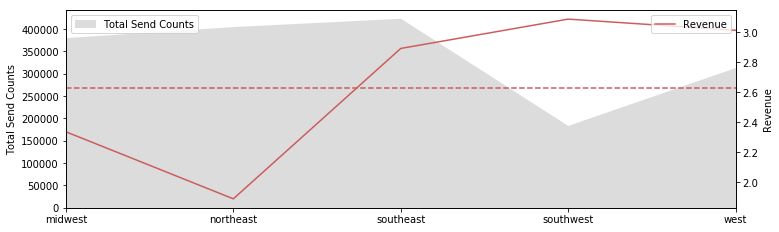

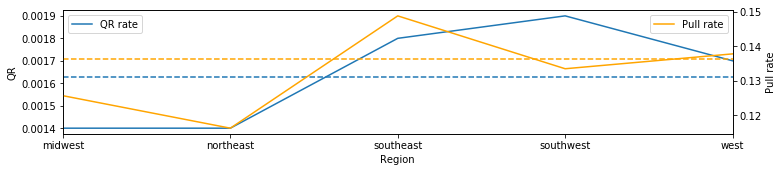

None


Region                                    midwest            northeast  \
Counts                0.0000         377,308.0000         401,938.0000   
                      1.0000             541.0000             559.0000   
Row Percent of Counts 0.0000               0.2232               0.2378   
                      1.0000               0.1964               0.2029   
QR rate               1.0000               0.0014               0.0014   
Pullthrough rate      1.0000               0.1257               0.1163   
 Average Margin       1.0000          12,984.1123          11,701.6633   
Revenue               1.0000               2.3367               1.8897   

Region                                  southeast            southwest  \
Counts                0.0000         420,307.0000         180,942.0000   
                      1.0000             766.0000             352.0000   
Row Percent of Counts 0.0000               0.2486               0.1070   
                      1.0000               0.2780               0.1278   
QR rate               1.0000               0.0018               0.0019   
Pullthrough rate      1.0000               0.1488               0.1335   
 Average Margin       1.0000          10,685.0277          11,913.5229   
Revenue               1.0000               2.8928               3.0885   

Region                                       west  
Counts                0.0000         310,088.0000  
                      1.0000             537.0000  
Row Percent of Counts 0.0000               0.1834  
                      1.0000               0.1949  
QR rate               1.0000               0.0017  
Pullthrough rate      1.0000               0.1378  
 Average Margin       1.0000          12,651.9312  
Revenue               1.0000               3.0141

In [208]:
print(plot_table('Region'))
table('Region')

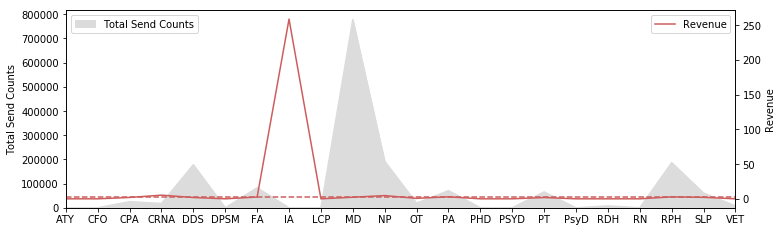

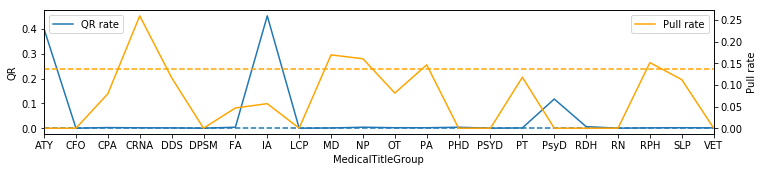

None


MedicalTitleGroup                             ATY                  CFO  \
Counts                0.0000               3.0000               1.0000   
                      1.0000               2.0000               0.0000   
Row Percent of Counts 0.0000               0.0000               0.0000   
                      1.0000               0.0007               0.0000   
QR rate               1.0000               0.4000               0.0000   
Pullthrough rate      1.0000               0.0000                  nan   
 Average Margin       1.0000                  nan                  nan   
Revenue               1.0000                  nan                  nan   

MedicalTitleGroup                             CPA                 CRNA  \
Counts                0.0000          25,343.0000          17,809.0000   
                      1.0000              63.0000              27.0000   
Row Percent of Counts 0.0000               0.0150               0.0105   
                      1.0000               0.0229               0.0098   
QR rate               1.0000               0.0025               0.0015   
Pullthrough rate      1.0000               0.0794               0.2593   
 Average Margin       1.0000           9,948.3209          13,472.1170   
Revenue               1.0000               1.9579               5.2873   

MedicalTitleGroup                             DDS                 DPSM  \
Counts                0.0000         177,741.0000               2.0000   
                      1.0000             206.0000               0.0000   
Row Percent of Counts 0.0000               0.1051               0.0000   
                      1.0000               0.0747               0.0000   
QR rate               1.0000               0.0012               0.0000   
Pullthrough rate      1.0000               0.1165                  nan   
 Average Margin       1.0000          13,869.1373                  nan   
Revenue               1.0000               1.8706                  nan   

MedicalTitleGroup                              FA                   IA  \
Counts                0.0000          82,422.0000              64.0000   
                      1.0000             321.0000              53.0000   
Row Percent of Counts 0.0000               0.0488               0.0000   
                      1.0000               0.1165               0.0192   
QR rate               1.0000               0.0039               0.4530   
Pullthrough rate      1.0000               0.0467               0.0566   
 Average Margin       1.0000          14,045.6954          10,089.6668   
Revenue               1.0000               2.5463             258.7094   

MedicalTitleGroup                             LCP                   MD  \
Counts                0.0000               1.0000         777,062.0000   
                      1.0000               0.0000             662.0000   
Row Percent of Counts 0.0000               0.0000               0.4596   
                      1.0000               0.0000               0.2402   
QR rate               1.0000               0.0000               0.0009   
Pullthrough rate      1.0000                  nan               0.1692   
 Average Margin       1.0000                  nan          15,858.6251   
Revenue               1.0000                  nan               2.2838   

MedicalTitleGroup                              NP                   OT  \
Counts                0.0000         191,235.0000          19,106.0000   
                      1.0000             755.0000              37.0000   
Row Percent of Counts 0.0000               0.1131               0.0113   
                      1.0000               0.2739               0.0134   
QR rate               1.0000               0.0039               0.0019   
Pullthrough rate      1.0000               0.1603               0.0811   
 Average Margin       1.0000           7,382.5037           4,062.7602   
Revenue               1.0000               4.6528               0.6367   

In [194]:
print(plot_table('MedicalTitleGroup'))
table('MedicalTitleGroup')

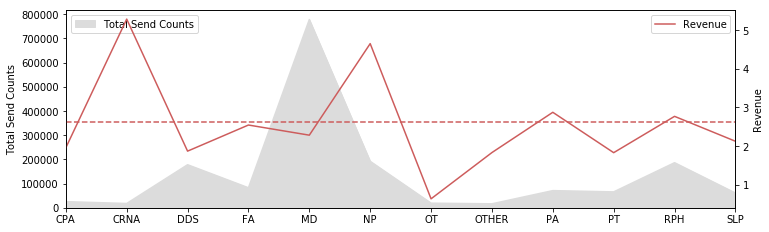

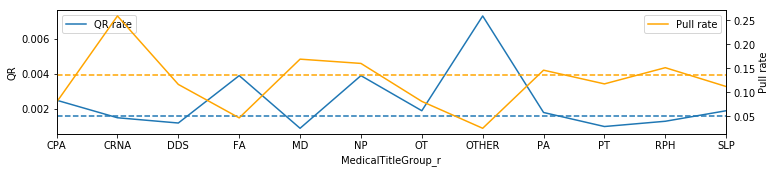

None


MedicalTitleGroup_r                           CPA                 CRNA  \
Counts                0.0000          25,343.0000          17,809.0000   
                      1.0000              63.0000              27.0000   
Row Percent of Counts 0.0000               0.0150               0.0105   
                      1.0000               0.0229               0.0098   
QR rate               1.0000               0.0025               0.0015   
Pullthrough rate      1.0000               0.0794               0.2593   
 Average Margin       1.0000           9,948.3209          13,472.1170   
Revenue               1.0000               1.9579               5.2873   

MedicalTitleGroup_r                           DDS                   FA  \
Counts                0.0000         177,741.0000          82,422.0000   
                      1.0000             206.0000             321.0000   
Row Percent of Counts 0.0000               0.1051               0.0488   
                      1.0000               0.0747               0.1165   
QR rate               1.0000               0.0012               0.0039   
Pullthrough rate      1.0000               0.1165               0.0467   
 Average Margin       1.0000          13,869.1373          14,045.6954   
Revenue               1.0000               1.8706               2.5463   

MedicalTitleGroup_r                            MD                   NP  \
Counts                0.0000         777,062.0000         191,235.0000   
                      1.0000             662.0000             755.0000   
Row Percent of Counts 0.0000               0.4596               0.1131   
                      1.0000               0.2402               0.2739   
QR rate               1.0000               0.0009               0.0039   
Pullthrough rate      1.0000               0.1692               0.1603   
 Average Margin       1.0000          15,858.6251           7,382.5037   
Revenue               1.0000               2.2838               4.6528   

MedicalTitleGroup_r                            OT                OTHER  \
Counts                0.0000          19,106.0000          16,388.0000   
                      1.0000              37.0000             120.0000   
Row Percent of Counts 0.0000               0.0113               0.0097   
                      1.0000               0.0134               0.0435   
QR rate               1.0000               0.0019               0.0073   
Pullthrough rate      1.0000               0.0811               0.0250   
 Average Margin       1.0000           4,062.7602          10,089.6668   
Revenue               1.0000               0.6367               1.8336   

MedicalTitleGroup_r                            PA                   PT  \
Counts                0.0000          70,873.0000          65,702.0000   
                      1.0000             130.0000              68.0000   
Row Percent of Counts 0.0000               0.0419               0.0389   
                      1.0000               0.0472               0.0247   
QR rate               1.0000               0.0018               0.0010   
Pullthrough rate      1.0000               0.1462               0.1176   
 Average Margin       1.0000          10,746.3125          15,052.5535   
Revenue               1.0000               2.8757               1.8309   

MedicalTitleGroup_r                           RPH                  SLP  
Counts                0.0000         186,056.0000          60,848.0000  
                      1.0000             251.0000             116.0000  
Row Percent of Counts 0.0000               0.1101               0.0360  
                      1.0000               0.0911               0.0421  
QR rate               1.0000               0.0013               0.0019  
Pullthrough rate      1.0000               0.1514               0.1121  
 Average Margin       1.0000          13,584.8412           9,972.3319  
Revenue               1.0000               2.7708               2.1265

In [197]:
## MeidicalTitle Group

print(plot_table('MedicalTitleGroup_r'))
table('MedicalTitleGroup_r')

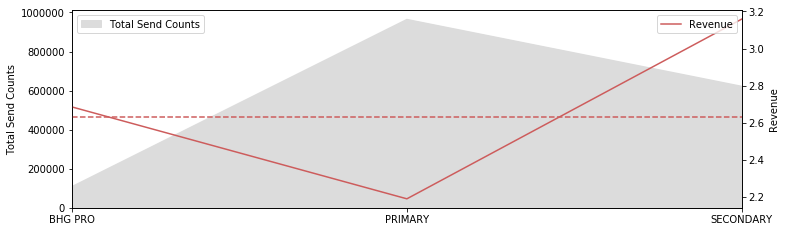

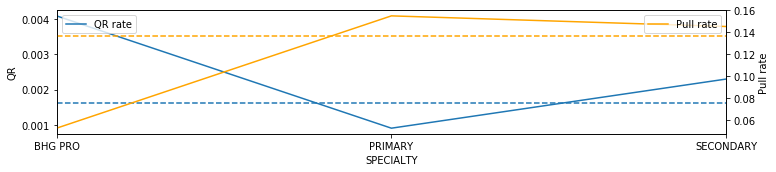

None


SPECIALTY                                 BHG PRO              PRIMARY  \
Counts                0.0000         107,832.0000         962,826.0000   
                      1.0000             439.0000             878.0000   
Row Percent of Counts 0.0000               0.0638               0.5695   
                      1.0000               0.1593               0.3186   
QR rate               1.0000               0.0041               0.0009   
Pullthrough rate      1.0000               0.0524               0.1549   
 Average Margin       1.0000          12,638.9581          15,515.1164   
Revenue               1.0000               2.6849               2.1895   

SPECIALTY                               SECONDARY  
Counts                0.0000         619,927.0000  
                      1.0000           1,439.0000  
Row Percent of Counts 0.0000               0.3667  
                      1.0000               0.5221  
QR rate               1.0000               0.0023  
Pullthrough rate      1.0000               0.1452  
 Average Margin       1.0000           9,391.3226  
Revenue               1.0000               3.1588

In [198]:
print(plot_table('SPECIALTY'))
table('SPECIALTY')

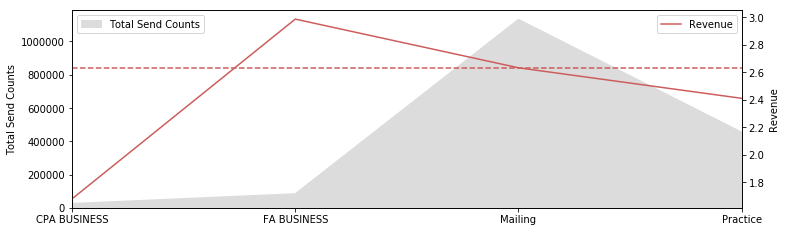

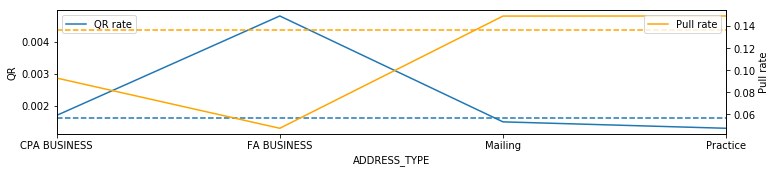

None


ADDRESS_TYPE                         CPA BUSINESS          FA BUSINESS  \
Counts                0.0000          24,759.0000          82,986.0000   
                      1.0000              43.0000             400.0000   
Row Percent of Counts 0.0000               0.0146               0.0491   
                      1.0000               0.0156               0.1451   
QR rate               1.0000               0.0017               0.0048   
Pullthrough rate      1.0000               0.0930               0.0475   
 Average Margin       1.0000          10,401.8452          13,109.9292   
Revenue               1.0000               1.6776               2.9872   

ADDRESS_TYPE                              Mailing             Practice  
Counts                0.0000       1,130,139.0000         452,701.0000  
                      1.0000           1,730.0000             583.0000  
Row Percent of Counts 0.0000               0.6685               0.2678  
                      1.0000               0.6277               0.2115  
QR rate               1.0000               0.0015               0.0013  
Pullthrough rate      1.0000               0.1491               0.1492  
 Average Margin       1.0000          11,548.6816          12,556.0930  
Revenue               1.0000               2.6324               2.4099

In [158]:
print(plot_table('ADDRESS_TYPE'))
table('ADDRESS_TYPE')

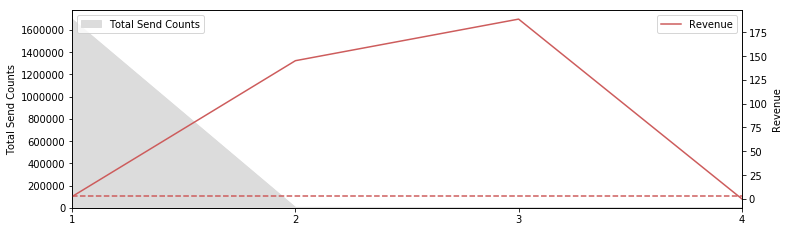

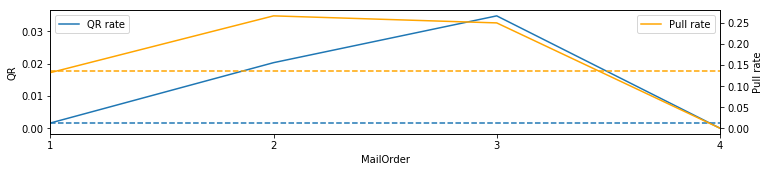

None


MailOrder                                       1                    2  \
Counts                0.0000       1,689,022.0000           1,450.0000   
                      1.0000           2,722.0000              30.0000   
Row Percent of Counts 0.0000               0.9991               0.0009   
                      1.0000               0.9877               0.0109   
QR rate               1.0000               0.0016               0.0203   
Pullthrough rate      1.0000               0.1319               0.2667   
 Average Margin       1.0000          11,500.3498          26,838.2942   
Revenue               1.0000               2.4405             145.0719   

MailOrder                                       3                    4  
Counts                0.0000             111.0000               2.0000  
                      1.0000               4.0000               0.0000  
Row Percent of Counts 0.0000               0.0001               0.0000  
                      1.0000               0.0015               0.0000  
QR rate               1.0000               0.0348               0.0000  
Pullthrough rate      1.0000               0.2500                  nan  
 Average Margin       1.0000          21,705.5222                  nan  
Revenue               1.0000             188.7437                  nan

In [209]:
print(plot_table('MailOrder'))
table('MailOrder')


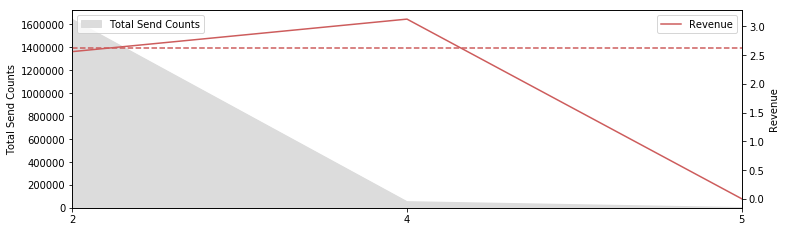

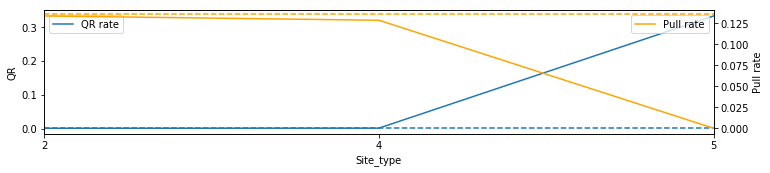

None


Site_type                                       2                    4  \
Counts                0.0000       1,639,133.0000          51,450.0000   
                      1.0000           2,654.0000             101.0000   
Row Percent of Counts 0.0000               0.9696               0.0304   
                      1.0000               0.9630               0.0366   
QR rate               1.0000               0.0016               0.0020   
Pullthrough rate      1.0000               0.1338               0.1287   
 Average Margin       1.0000          11,834.6640          12,389.0181   
Revenue               1.0000               2.5590               3.1242   

Site_type                                       5  
Counts                0.0000               2.0000  
                      1.0000               1.0000  
Row Percent of Counts 0.0000               0.0000  
                      1.0000               0.0004  
QR rate               1.0000               0.3333  
Pullthrough rate      1.0000               0.0000  
 Average Margin       1.0000                  nan  
Revenue               1.0000                  nan

In [199]:
print(plot_table('Site_type'))
table('Site_type')

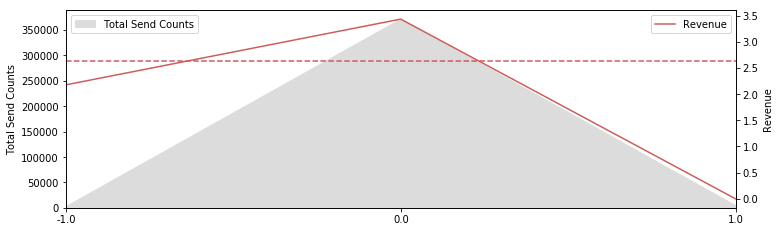

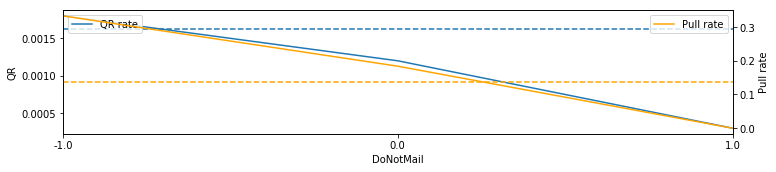

None


DoNotMail                                 -1.0000               0.0000  \
Counts                0.0000           1,667.0000         369,924.0000   
                      1.0000               3.0000             462.0000   
Row Percent of Counts 0.0000               0.0044               0.9852   
                      1.0000               0.0064               0.9914   
QR rate               1.0000               0.0018               0.0012   
Pullthrough rate      1.0000               0.3333               0.1840   
 Average Margin       1.0000           3,635.0992          14,954.8453   
Revenue               1.0000               2.1767               3.4320   

DoNotMail                                  1.0000  
Counts                0.0000           3,907.0000  
                      1.0000               1.0000  
Row Percent of Counts 0.0000               0.0104  
                      1.0000               0.0021  
QR rate               1.0000               0.0003  
Pullthrough rate      1.0000               0.0000  
 Average Margin       1.0000                  nan  
Revenue               1.0000                  nan

In [200]:
print(plot_table('DoNotMail'))
table('DoNotMail')


In [ ]:
print(plot_table('DoNotMail'))
table('DoNotMail')

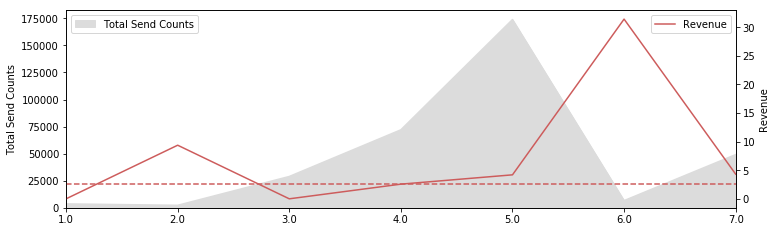

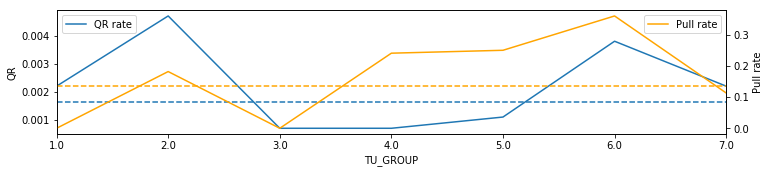

None


TU_GROUP                                   1.0000               2.0000  \
Counts                0.0000           3,618.0000           2,308.0000   
                      1.0000               8.0000              11.0000   
Row Percent of Counts 0.0000               0.0108               0.0069   
                      1.0000               0.0190               0.0262   
QR rate               1.0000               0.0022               0.0047   
Pullthrough rate      1.0000               0.0000               0.1818   
 Average Margin       1.0000                  nan          10,854.4601   
Revenue               1.0000                  nan               9.3613   

TU_GROUP                                   3.0000               4.0000  \
Counts                0.0000          28,921.0000          71,998.0000   
                      1.0000              20.0000              54.0000   
Row Percent of Counts 0.0000               0.0860               0.2141   
                      1.0000               0.0476               0.1286   
QR rate               1.0000               0.0007               0.0007   
Pullthrough rate      1.0000               0.0000               0.2407   
 Average Margin       1.0000                  nan          14,196.6349   
Revenue               1.0000                  nan               2.5614   

TU_GROUP                                   5.0000               6.0000  \
Counts                0.0000         173,693.0000           6,624.0000   
                      1.0000             196.0000              25.0000   
Row Percent of Counts 0.0000               0.5166               0.0197   
                      1.0000               0.4667               0.0595   
QR rate               1.0000               0.0011               0.0038   
Pullthrough rate      1.0000               0.2500               0.3600   
 Average Margin       1.0000          14,862.6836          23,185.3162   
Revenue               1.0000               4.1881              31.3833   

TU_GROUP                                   7.0000  
Counts                0.0000          49,053.0000  
                      1.0000             106.0000  
Row Percent of Counts 0.0000               0.1459  
                      1.0000               0.2524  
QR rate               1.0000               0.0022  
Pullthrough rate      1.0000               0.1132  
 Average Margin       1.0000          17,645.2875  
Revenue               1.0000               4.3073

In [159]:
print(plot_table('TU_GROUP'))
table('TU_GROUP')

In [ ]:
print(plot_table('Previous_TU_GROUP'))
table('c')

In [ ]:
print(plot_table('Bad_Data'))
table('Bad_Data')

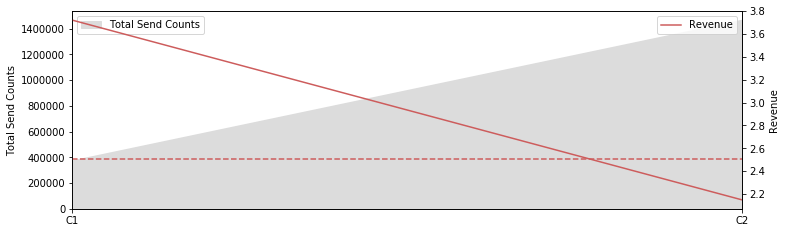

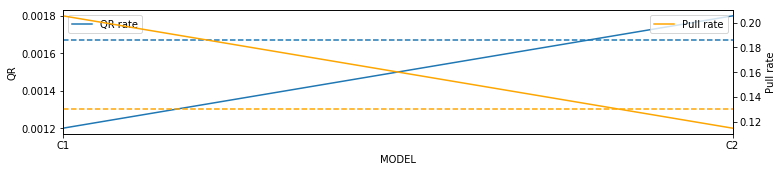

None


MODEL                                          C1                   C2
Counts                0.0000         369,744.0000       1,459,858.0000
                      1.0000             438.0000           2,617.0000
Row Percent of Counts 0.0000               0.2021               0.7979
                      1.0000               0.1434               0.8566
QR rate               1.0000               0.0012               0.0018
Pullthrough rate      1.0000               0.2055               0.1146
 Average Margin       1.0000          15,301.1188          10,480.7846
Revenue               1.0000               3.7201               2.1499

In [93]:
print(plot_table('MODEL'))
table('MODEL')

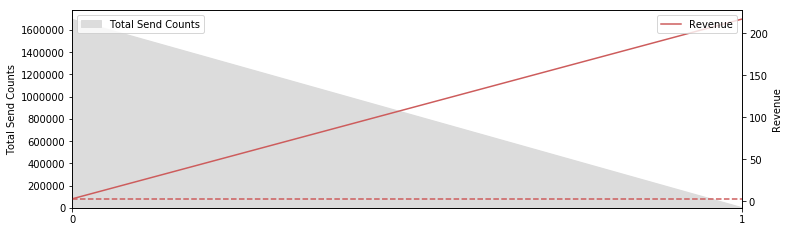

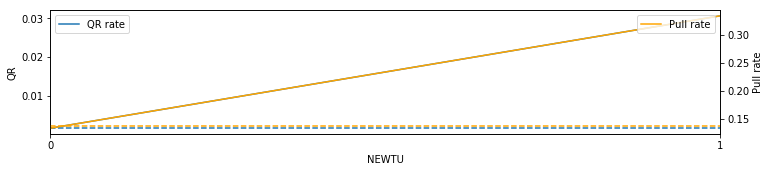

None


NEWTU                                           0                    1
Counts                0.0000       1,690,490.0000              95.0000
                      1.0000           2,753.0000               3.0000
Row Percent of Counts 0.0000               0.9999               0.0001
                      1.0000               0.9989               0.0011
QR rate               1.0000               0.0016               0.0306
Pullthrough rate      1.0000               0.1333               0.3333
 Average Margin       1.0000          11,828.8101          21,236.4667
Revenue               1.0000               2.5638             216.6986

In [160]:
# DO NOT USE THIS VARIABLE

print(plot_table('NEWTU'))
table('NEWTU')

### Continous--------------------------------------------------------------------

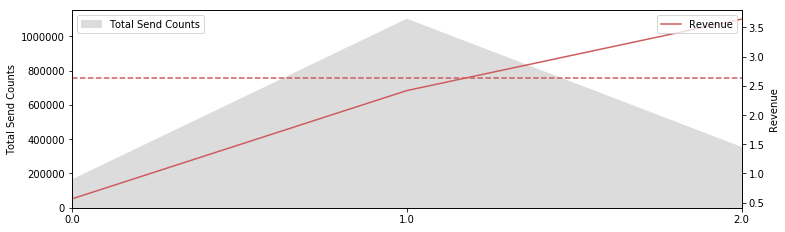

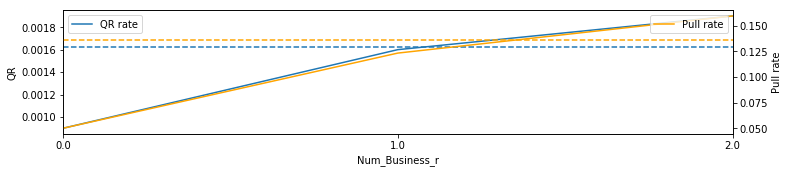

None


Num_Business_r                             0.0000               1.0000  \
Counts                0.0000         160,896.0000       1,095,464.0000   
                      1.0000             140.0000           1,792.0000   
Row Percent of Counts 0.0000               0.1002               0.6823   
                      1.0000               0.0538               0.6884   
QR rate               1.0000               0.0009               0.0016   
Pullthrough rate      1.0000               0.0500               0.1233   
 Average Margin       1.0000          12,969.3344          12,004.9047   
Revenue               1.0000               0.5638               2.4179   

Num_Business_r                             2.0000  
Counts                0.0000         349,183.0000  
                      1.0000             671.0000  
Row Percent of Counts 0.0000               0.2175  
                      1.0000               0.2578  
QR rate               1.0000               0.0019  
Pullthrough rate      1.0000               0.1595  
 Average Margin       1.0000          11,906.6115  
Revenue               1.0000               3.6415

In [182]:
print(plot_table('Num_Business_r'))
table('Num_Business_r')

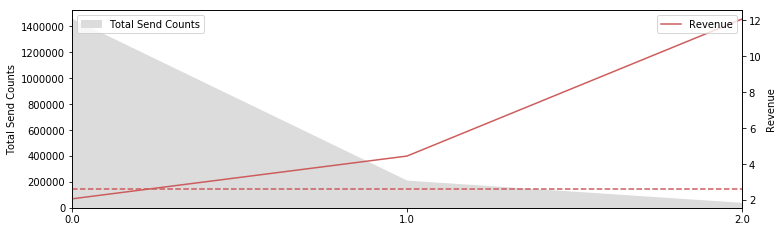

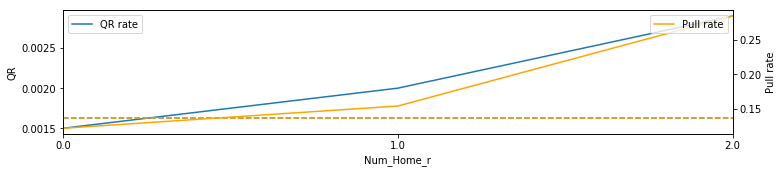

None


Num_Home_r                                 0.0000               1.0000  \
Counts                0.0000       1,449,050.0000         203,666.0000   
                      1.0000           2,236.0000             402.0000   
Row Percent of Counts 0.0000               0.8598               0.1208   
                      1.0000               0.8181               0.1471   
QR rate               1.0000               0.0015               0.0020   
Pullthrough rate      1.0000               0.1221               0.1542   
 Average Margin       1.0000          10,929.3382          14,612.1655   
Revenue               1.0000               2.0559               4.4395   

Num_Home_r                                 2.0000  
Counts                0.0000          32,622.0000  
                      1.0000              95.0000  
Row Percent of Counts 0.0000               0.0194  
                      1.0000               0.0348  
QR rate               1.0000               0.0029  
Pullthrough rate      1.0000               0.2842  
 Average Margin       1.0000          14,630.1833  
Revenue               1.0000              12.0737

In [183]:
print(plot_table('Num_Home_r'))
table('Num_Home_r')

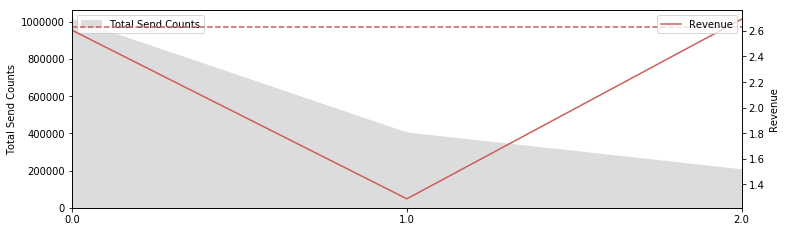

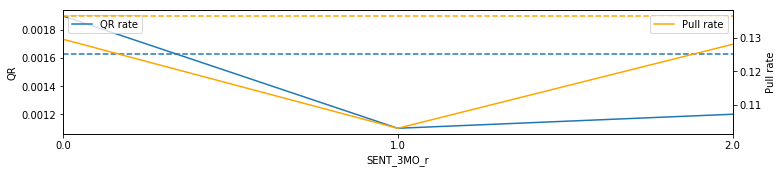

None


SENT_3MO_r                                 0.0000               1.0000  \
Counts                0.0000       1,009,628.0000         400,632.0000   
                      1.0000           1,930.0000             456.0000   
Row Percent of Counts 0.0000               0.6259               0.2484   
                      1.0000               0.7322               0.1730   
QR rate               1.0000               0.0019               0.0011   
Pullthrough rate      1.0000               0.1295               0.1031   
 Average Margin       1.0000          10,535.0194          10,990.2369   
Revenue               1.0000               2.6037               1.2878   

SENT_3MO_r                                 2.0000  
Counts                0.0000         202,823.0000  
                      1.0000             250.0000  
Row Percent of Counts 0.0000               0.1257  
                      1.0000               0.0948  
QR rate               1.0000               0.0012  
Pullthrough rate      1.0000               0.1280  
 Average Margin       1.0000          17,075.5868  
Revenue               1.0000               2.6908

In [180]:
print(plot_table('SENT_3MO_r'))
table('SENT_3MO_r')

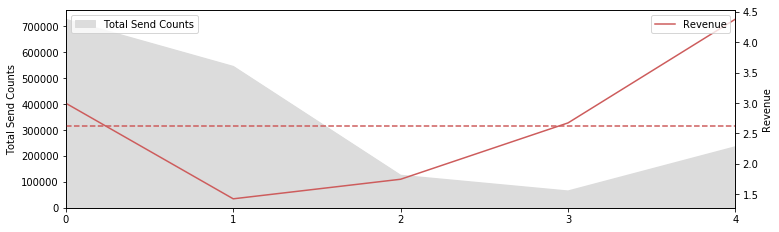

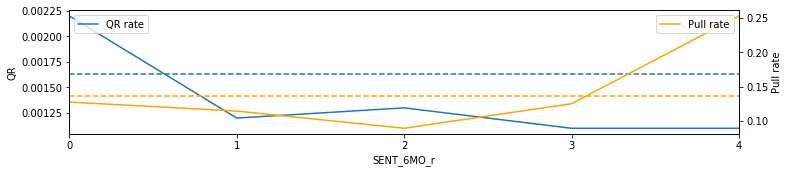

None


SENT_6MO_r                                      0                    1  \
Counts                0.0000         723,975.0000         543,602.0000   
                      1.0000           1,609.0000             665.0000   
Row Percent of Counts 0.0000               0.4282               0.3215   
                      1.0000               0.5838               0.2413   
QR rate               1.0000               0.0022               0.0012   
Pullthrough rate      1.0000               0.1274               0.1143   
 Average Margin       1.0000          10,605.5731          10,212.7440   
Revenue               1.0000               2.9964               1.4261   

SENT_6MO_r                                      2                    3  \
Counts                0.0000         124,487.0000          64,138.0000   
                      1.0000             157.0000              72.0000   
Row Percent of Counts 0.0000               0.0736               0.0379   
                      1.0000               0.0570               0.0261   
QR rate               1.0000               0.0013               0.0011   
Pullthrough rate      1.0000               0.0892               0.1250   
 Average Margin       1.0000          15,557.9824          19,071.5493   
Revenue               1.0000               1.7475               2.6732   

SENT_6MO_r                                      4  
Counts                0.0000         234,383.0000  
                      1.0000             253.0000  
Row Percent of Counts 0.0000               0.1386  
                      1.0000               0.0918  
QR rate               1.0000               0.0011  
Pullthrough rate      1.0000               0.2530  
 Average Margin       1.0000          16,052.7285  
Revenue               1.0000               4.3786

In [164]:
print(plot_table('SENT_6MO_r'))
table('SENT_6MO_r')

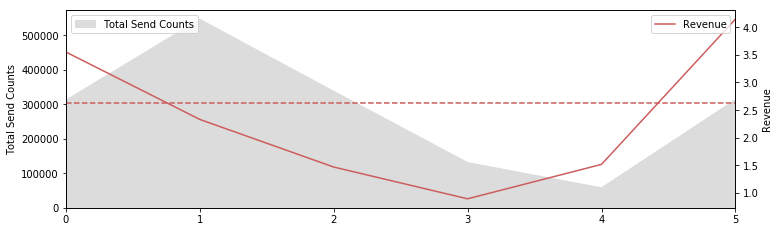

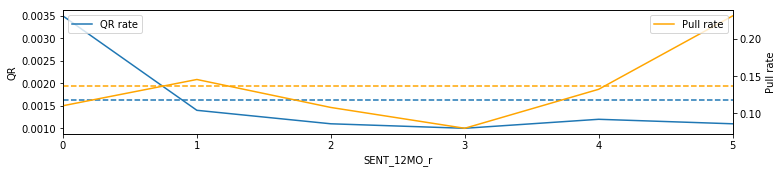

None


SENT_12MO_r                                     0                    1  \
Counts                0.0000         309,867.0000         544,758.0000   
                      1.0000           1,097.0000             776.0000   
Row Percent of Counts 0.0000               0.1833               0.3222   
                      1.0000               0.3980               0.2816   
QR rate               1.0000               0.0035               0.0014   
Pullthrough rate      1.0000               0.1103               0.1456   
 Average Margin       1.0000           9,130.7941          11,244.0037   
Revenue               1.0000               3.5529               2.3290   

SENT_12MO_r                                     2                    3  \
Counts                0.0000         336,521.0000         130,223.0000   
                      1.0000             361.0000             125.0000   
Row Percent of Counts 0.0000               0.1991               0.0770   
                      1.0000               0.1310               0.0454   
QR rate               1.0000               0.0011               0.0010   
Pullthrough rate      1.0000               0.1080               0.0800   
 Average Margin       1.0000          12,652.3548          11,570.8164   
Revenue               1.0000               1.4647               0.8877   

SENT_12MO_r                                     4                    5  
Counts                0.0000          57,057.0000         312,159.0000  
                      1.0000              68.0000             329.0000  
Row Percent of Counts 0.0000               0.0337               0.1846  
                      1.0000               0.0247               0.1194  
QR rate               1.0000               0.0012               0.0011  
Pullthrough rate      1.0000               0.1324               0.2310  
 Average Margin       1.0000           9,599.8990          17,061.3541  
Revenue               1.0000               1.5125               4.1495

In [165]:
print(plot_table('SENT_12MO_r'))
table('SENT_12MO_r')

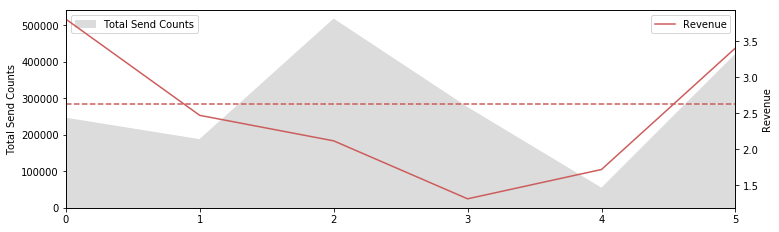

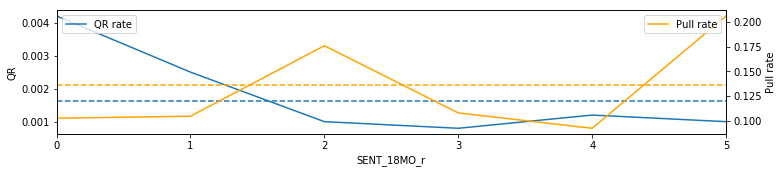

None


SENT_18MO_r                                     0                    1  \
Counts                0.0000         243,897.0000         185,684.0000   
                      1.0000           1,024.0000             469.0000   
Row Percent of Counts 0.0000               0.1443               0.1098   
                      1.0000               0.3716               0.1702   
QR rate               1.0000               0.0042               0.0025   
Pullthrough rate      1.0000               0.1025               0.1045   
 Average Margin       1.0000           8,884.9864           9,387.5245   
Revenue               1.0000               3.8091               2.4710   

SENT_18MO_r                                     2                    3  \
Counts                0.0000         515,676.0000         273,481.0000   
                      1.0000             529.0000             232.0000   
Row Percent of Counts 0.0000               0.3050               0.1618   
                      1.0000               0.1919               0.0842   
QR rate               1.0000               0.0010               0.0008   
Pullthrough rate      1.0000               0.1758               0.1078   
 Average Margin       1.0000          11,748.3625          14,350.2701   
Revenue               1.0000               2.1166               1.3107   

SENT_18MO_r                                     4                    5  
Counts                0.0000          52,548.0000         419,299.0000  
                      1.0000              65.0000             437.0000  
Row Percent of Counts 0.0000               0.0311               0.2480  
                      1.0000               0.0236               0.1586  
QR rate               1.0000               0.0012               0.0010  
Pullthrough rate      1.0000               0.0923               0.2059  
 Average Margin       1.0000          15,068.1792          15,891.3641  
Revenue               1.0000               1.7184               3.4074

In [166]:
print(plot_table('SENT_18MO_r'))
table('SENT_18MO_r')

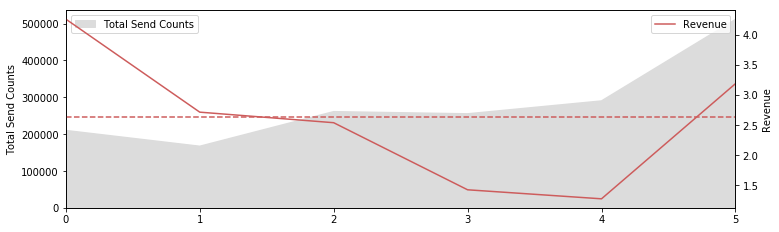

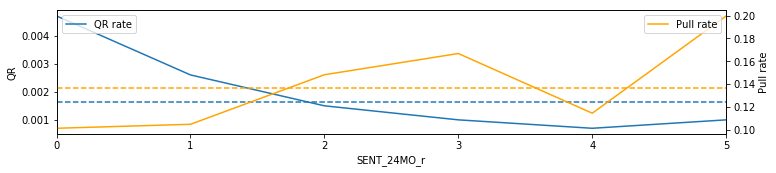

None


SENT_24MO_r                                     0                    1  \
Counts                0.0000         208,772.0000         166,493.0000   
                      1.0000             978.0000             430.0000   
Row Percent of Counts 0.0000               0.1235               0.0985   
                      1.0000               0.3549               0.1560   
QR rate               1.0000               0.0047               0.0026   
Pullthrough rate      1.0000               0.1012               0.1047   
 Average Margin       1.0000           9,023.4973          10,066.0963   
Revenue               1.0000               4.2590               2.7137   

SENT_24MO_r                                     2                    3  \
Counts                0.0000         260,468.0000         254,729.0000   
                      1.0000             385.0000             246.0000   
Row Percent of Counts 0.0000               0.1541               0.1507   
                      1.0000               0.1397               0.0893   
QR rate               1.0000               0.0015               0.0010   
Pullthrough rate      1.0000               0.1481               0.1667   
 Average Margin       1.0000          11,616.4981           8,857.0711   
Revenue               1.0000               2.5384               1.4242   

SENT_24MO_r                                     4                    5  
Counts                0.0000         289,696.0000         510,427.0000  
                      1.0000             201.0000             516.0000  
Row Percent of Counts 0.0000               0.1714               0.3019  
                      1.0000               0.0729               0.1872  
QR rate               1.0000               0.0007               0.0010  
Pullthrough rate      1.0000               0.1144               0.1996  
 Average Margin       1.0000          16,061.9868          15,806.0244  
Revenue               1.0000               1.2743               3.1863

In [167]:
print(plot_table('SENT_24MO_r'))
table('SENT_24MO_r')

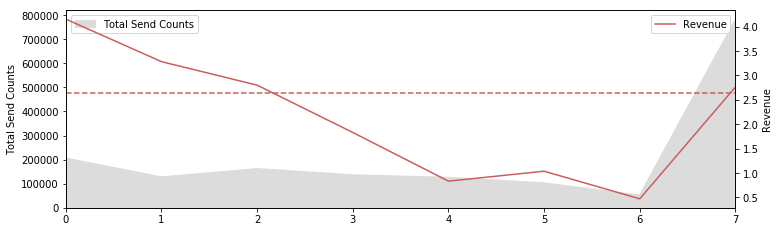

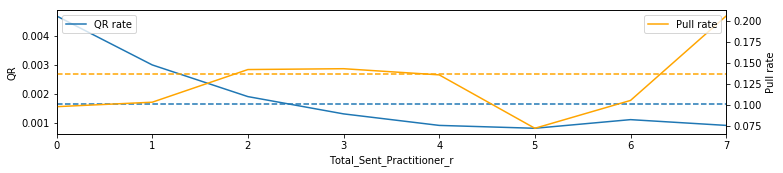

None


Total_Sent_Practitioner_r                       0                    1  \
Counts                0.0000         204,640.0000         127,037.0000   
                      1.0000             970.0000             378.0000   
Row Percent of Counts 0.0000               0.1210               0.0751   
                      1.0000               0.3520               0.1372   
QR rate               1.0000               0.0047               0.0030   
Pullthrough rate      1.0000               0.0979               0.1032   
 Average Margin       1.0000           8,989.7948          10,721.0630   
Revenue               1.0000               4.1536               3.2816   

Total_Sent_Practitioner_r                       2                    3  \
Counts                0.0000         161,677.0000         136,000.0000   
                      1.0000             303.0000             175.0000   
Row Percent of Counts 0.0000               0.0956               0.0804   
                      1.0000               0.1099               0.0635   
QR rate               1.0000               0.0019               0.0013   
Pullthrough rate      1.0000               0.1419               0.1429   
 Average Margin       1.0000          10,546.4689           9,966.0799   
Revenue               1.0000               2.7997               1.8296   

Total_Sent_Practitioner_r                       4                    5  \
Counts                0.0000         125,642.0000         102,540.0000   
                      1.0000             118.0000              83.0000   
Row Percent of Counts 0.0000               0.0743               0.0607   
                      1.0000               0.0428               0.0301   
QR rate               1.0000               0.0009               0.0008   
Pullthrough rate      1.0000               0.1356               0.0723   
 Average Margin       1.0000           6,537.4085          17,708.9848   
Revenue               1.0000               0.8317               1.0354   

Total_Sent_Practitioner_r                       6                    7  
Counts                0.0000          52,189.0000         780,860.0000  
                      1.0000              57.0000             672.0000  
Row Percent of Counts 0.0000               0.0309               0.4619  
                      1.0000               0.0207               0.2438  
QR rate               1.0000               0.0011               0.0009  
Pullthrough rate      1.0000               0.1053               0.2054  
 Average Margin       1.0000           4,087.4694          15,642.8090  
Revenue               1.0000               0.4694               2.7621

In [186]:
print(plot_table('Total_Sent_Practitioner_r'))
table('Total_Sent_Practitioner_r')

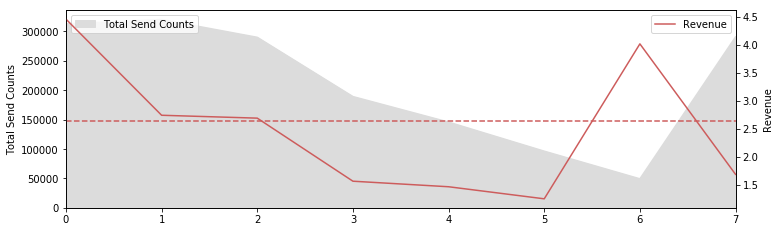

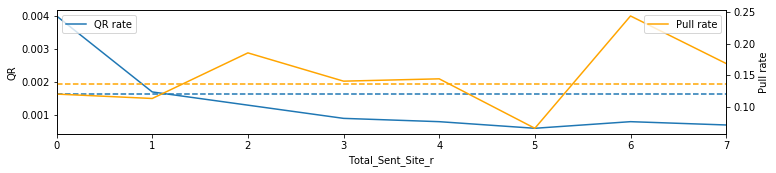

None


Total_Sent_Site_r                               0                    1  \
Counts                0.0000         311,411.0000         319,479.0000   
                      1.0000           1,251.0000             558.0000   
Row Percent of Counts 0.0000               0.1842               0.1890   
                      1.0000               0.4539               0.2025   
QR rate               1.0000               0.0040               0.0017   
Pullthrough rate      1.0000               0.1199               0.1129   
 Average Margin       1.0000           9,287.9879          13,919.1994   
Revenue               1.0000               4.4559               2.7400   

Total_Sent_Site_r                               2                    3  \
Counts                0.0000         289,468.0000         188,913.0000   
                      1.0000             367.0000             171.0000   
Row Percent of Counts 0.0000               0.1712               0.1117   
                      1.0000               0.1332               0.0620   
QR rate               1.0000               0.0013               0.0009   
Pullthrough rate      1.0000               0.1853               0.1404   
 Average Margin       1.0000          11,459.5532          12,315.6772   
Revenue               1.0000               2.6886               1.5632   

Total_Sent_Site_r                               4                    5  \
Counts                0.0000         145,555.0000          96,183.0000   
                      1.0000             111.0000              61.0000   
Row Percent of Counts 0.0000               0.0861               0.0569   
                      1.0000               0.0403               0.0221   
QR rate               1.0000               0.0008               0.0006   
Pullthrough rate      1.0000               0.1441               0.0656   
 Average Margin       1.0000          13,330.6636          30,049.7121   
Revenue               1.0000               1.4642               1.2489   

Total_Sent_Site_r                               6                    7  
Counts                0.0000          49,224.0000         290,352.0000  
                      1.0000              41.0000             196.0000  
Row Percent of Counts 0.0000               0.0291               0.1717  
                      1.0000               0.0149               0.0711  
QR rate               1.0000               0.0008               0.0007  
Pullthrough rate      1.0000               0.2439               0.1684  
 Average Margin       1.0000          19,775.3529          14,838.1491  
Revenue               1.0000               4.0141               1.6853

In [187]:
print(plot_table('Total_Sent_Site_r'))
table('Total_Sent_Site_r')

In [ ]:
print(plot_table('State'))
table('State')

In [217]:
def table_n (variable):

    table= pd.concat([pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=1),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_pull.FUND_CNT,   pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_margin.FUND_CNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop'),values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_pull.FUND_CNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_margin.FUND_CNT, pd.qcut(DnB_F1[variable],q=10,duplicates='drop'),values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean)],
                      keys=['Counts', 'Row Percent of Counts','QR rate','Pullthrough rate',' Average Margin','Revenue']
                      )
     
    return table

In [222]:
def plot_table_n (variable):  
    names = list(table_n(variable).columns.values)
    names_label=[str(x) for x in names]
    values0 =list(table_n(variable).iloc[0,:]+table_n(variable).iloc[1,:])
    values_re=list(table_n(variable).iloc[7,:])
    value_qr=list(table_n(variable).iloc[4,:])
    value_pt=list(table_n(variable).iloc[5,:])
    df=pd.DataFrame({'Count':values0,'Revenue':values_re,'QRate':value_qr,'Pull':value_pt})
    df.fillna(0, inplace=True)


    fig = plt.figure(figsize=(12,8))
   
    ax=plt.subplot(2, 1, 1)
    df.iloc[:,0].plot(kind='area',label='Total Send Counts',color='gainsboro')
    ax.set_ylabel('Total Send Counts')
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    df.iloc[:,3].plot(color='indianred',label='Revenue')
    plt.axhline(y=3.4, color='indianred', linestyle='--')
    ax2.set_ylabel('Revenue')
    ax2.legend(loc='upper right')
    plt.xticks(range(len(names_label)),names_label) 
    
    fig= plt.figure(figsize=(12,5))    
    
    ax3=plt.subplot(2, 1, 2)
    df.iloc[:,2].plot(label='QR rate')
    ax3.set_ylabel('QR')
    ax3.legend(loc='upper left')
    plt.axhline(y=0.00184, linestyle='--')
    ax3.set_xlabel(variable)
    
    ax4 = ax3.twinx()
    df.iloc[:,1].plot(color='orange',label='Pull rate')
    ax4.set_ylabel('Pull rate')
    ax4.legend(loc='upper right')
    plt.axhline(y=0.153, color='orange',linestyle='--')
    plt.xticks(range(len(names_label)),names_label) 
    plt.show()
    

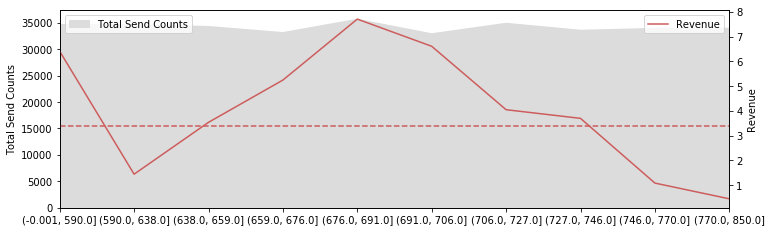

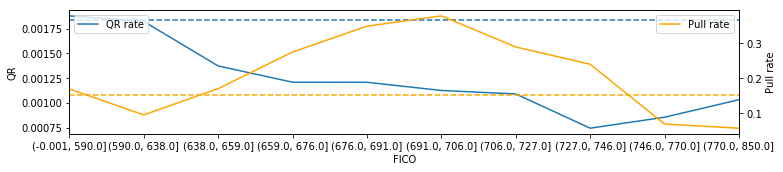

None


FICO                              (-0.001, 590.0]       (590.0, 638.0]  \
Counts                0.0000          34,558.0000          34,521.0000   
                      1.0000              65.0000              63.0000   
Row Percent of Counts 0.0000               0.1014               0.1013   
                      1.0000               0.1540               0.1493   
QR rate               1.0000               0.0019               0.0018   
Pullthrough rate      1.0000               0.1692               0.0952   
 Average Margin       1.0000          20,169.1345           8,275.0986   
Revenue               1.0000               6.4079               1.4357   

FICO                               (638.0, 659.0]       (659.0, 676.0]  \
Counts                0.0000          34,185.0000          33,049.0000   
                      1.0000              47.0000              40.0000   
Row Percent of Counts 0.0000               0.1003               0.0970   
                      1.0000               0.1114               0.0948   
QR rate               1.0000               0.0014               0.0012   
Pullthrough rate      1.0000               0.1702               0.2750   
 Average Margin       1.0000          15,120.0358          15,773.0447   
Revenue               1.0000               3.5335               5.2435   

FICO                               (676.0, 691.0]       (691.0, 706.0]  \
Counts                0.0000          35,549.0000          32,823.0000   
                      1.0000              43.0000              37.0000   
Row Percent of Counts 0.0000               0.1043               0.0963   
                      1.0000               0.1019               0.0877   
QR rate               1.0000               0.0012               0.0011   
Pullthrough rate      1.0000               0.3488               0.3784   
 Average Margin       1.0000          18,292.5838          15,514.7546   
Revenue               1.0000               7.7093               6.6101   

FICO                               (706.0, 727.0]       (727.0, 746.0]  \
Counts                0.0000          34,800.0000          33,495.0000   
                      1.0000              38.0000              25.0000   
Row Percent of Counts 0.0000               0.1021               0.0983   
                      1.0000               0.0900               0.0592   
QR rate               1.0000               0.0011               0.0007   
Pullthrough rate      1.0000               0.2895               0.2400   
 Average Margin       1.0000          12,808.1844          20,638.0968   
Revenue               1.0000               4.0441               3.6942   

FICO                               (746.0, 770.0]       (770.0, 850.0]  
Counts                0.0000          33,842.0000          33,865.0000  
                      1.0000              29.0000              35.0000  
Row Percent of Counts 0.0000               0.0993               0.0994  
                      1.0000               0.0687               0.0829  
QR rate               1.0000               0.0009               0.0010  
Pullthrough rate      1.0000               0.0690               0.0571  
 Average Margin       1.0000          18,217.2479           7,444.4401  
Revenue               1.0000               1.0757               0.4392

In [223]:
print(plot_table_n('FICO'))
table_n('FICO')

### NEWMARGIN

In [ ]:
print(plot_table_n('NEWMARGIN'))
table_n('NEWMARGIN')

In [34]:
pd.concat([pd.crosstab( pd.qcut(DnB_F1['NEWMARGIN'], q=10000,duplicates='drop'),DnB_F1.FUND_CNT),
           pd.crosstab( pd.qcut(DnB_F1['NEWMARGIN'], q=10000,duplicates='drop'),DnB_F1.FUND_CNT).apply(lambda r: r/r.sum(), axis=1)[[1]]  
            ],axis=1)

Fund_Cnt,0,1,1
NewMargin,,,
"(-7930.402, 0.0]",2919423,39,0.000013
"(0.0, 991.653]",0,39,1.000000
"(991.653, 8582.102]",0,293,1.000000
"(8582.102, 97434.655]",0,292,1.000000


In [33]:
pd.crosstab( pd.qcut(DnB_F1['NEWMARGIN'], q=10000,duplicates='drop'),[DnB_F1.QUALITY_RESPONSECOUNT,DnB_F1.FUND_CNT])

ResponseCount                0        1     
Fund_Cnt                     0  1     0    1
NewMargin                                   
(-7930.402, 0.0]       2914439  0  4984   39
(0.0, 991.653]               0  0     0   39
(991.653, 4798.907]          0  0     0  146
(4798.907, 8582.102]         0  0     0  147
(8582.102, 16550.43]         0  0     0  145
(16550.43, 97434.655]        0  1     0  146

In [203]:
def chi_test(variable):
    crosstab=pd.crosstab(pd.qcut(DnB_F1['NEWMARGIN'], q=5000,duplicates='drop'), DnB_F1[variable])
    crosstab=pd.DataFrame(crosstab)
    print ('\033[1m',"chi_p_value is",round(chi2_contingency(crosstab)[1],4),'\033[0m',"------------------------------------------------")  
    print(crosstab)


In [453]:
def chi_test_n(variable):
    crosstab=pd.crosstab(pd.qcut(DnB_F1['NEWMARGIN'], q=5000,duplicates='drop'), pd.qcut(DnB_F1[variable], q=10,duplicates='drop'))
    crosstab=pd.DataFrame(crosstab)
    print ('\033[1m',"chi_p_value is",round(chi2_contingency(crosstab)[1],4),'\033[0m',"------------------------------------------------")  
    return crosstab


In [454]:
chi_test_n('AVERAGE_HIGH_CREDIT_HIGH_CREDIT')

 chi_p_value is 0.0586  ------------------------------------------------


AVERAGE_HIGH_CREDIT_HIGH_CREDIT,"(49.999, 75.0]","(75.0, 110.0]","(110.0, 175.0]","(175.0, 250.0]","(250.0, 292.0]","(292.0, 390.0]","(390.0, 500.0]","(500.0, 662.0]","(662.0, 883.0]","(883.0, 1150.0]","(1150.0, 1515.0]","(1515.0, 2016.0]","(2016.0, 2541.0]","(2541.0, 3387.0]","(3387.0, 4625.0]","(4625.0, 6300.0]","(6300.0, 10000.0]","(10000.0, 22592.2]","(22592.2, 8466741.0]"
Margin072018,,,,,,,,,,,,,,,,,,,
"(-1076.749, 0.0]",32605,13366,16576,20261,8859,15204,16788,13851,15305,15097,15187,15409,15076,15265,15255,15283,15811,14651,15255
"(0.0, 6767.892]",3,0,0,0,0,2,3,1,4,2,1,4,5,0,3,3,6,4,1
"(6767.892, 68168.19]",10,2,2,2,3,2,6,1,4,6,2,1,0,4,1,3,6,3,5


In [444]:
chi_test_n('EMPLOYEES_HERE')

 chi_p_value is 0.0433  ------------------------------------------------


EMPLOYEES_HERE,"(-0.001, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 7.0]","(7.0, 11.0]","(11.0, 20.0]","(20.0, 50.0]","(50.0, 55000.0]"
Margin072018,,,,,,,,,
"(-1076.749, 0.0]",61831,66500,43451,33953,35289,41446,41416,34288,38036
"(0.0, 4451.884]",7,8,0,2,6,5,0,1,6
"(4451.884, 12874.355]",10,9,3,4,5,5,4,2,8
"(12874.355, 68168.19]",7,15,6,5,1,8,1,1,6


## Continous Variables

In [36]:
def table_n (variable):

    table= pd.concat([pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=1),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_pull.FUND_CNT,   pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:],
                      pd.crosstab(DnB_F_margin.FUND_CNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop'),values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean),
                      pd.crosstab(DnB_F1.QUALITY_RESPONSECOUNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_pull.FUND_CNT, pd.qcut(DnB_F1[variable], q=10,duplicates='drop')).apply(lambda r: r/r.sum(), axis=0)[1:]*pd.crosstab(DnB_F_margin.FUND_CNT, pd.qcut(DnB_F1[variable],q=10,duplicates='drop'),values=DnB_F_margin['NEWMARGIN'],aggfunc=np.mean)],
                      keys=['Counts', 'Row Percent of Counts','QR rate','Pullthrough rate',' Average Margin','Revenue']
                      )
     
    return table

In [37]:
def plot_table_n (variable):  
    names = list(table_n(variable).columns.values)
    names_label=[str(x) for x in names]
    values0 =list(table_n(variable).iloc[0,:]+table_n(variable).iloc[1,:])
    values_re=list(table_n(variable).iloc[7,:])
    value_qr=list(table_n(variable).iloc[4,:])
    value_pt=list(table_n(variable).iloc[5,:])
    df=pd.DataFrame({'Count':values0,'Revenue':values_re,'QRate':value_qr,'Pull':value_pt})
    df.fillna(0, inplace=True)


    fig = plt.figure(figsize=(12,8))
   
    ax=plt.subplot(2, 1, 1)
    df.iloc[:,0].plot(kind='area',label='Total Send Counts',color='gainsboro')
    ax.set_ylabel('Total Send Counts')
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    df.iloc[:,3].plot(color='indianred',label='Revenue')
    plt.axhline(y=3.4, color='indianred', linestyle='--')
    ax2.set_ylabel('Revenue')
    ax2.legend(loc='upper right')
    plt.xticks(range(len(names_label)),names_label) 
    
    fig= plt.figure(figsize=(12,5))    
    
    ax3=plt.subplot(2, 1, 2)
    df.iloc[:,2].plot(label='QR rate')
    ax3.set_ylabel('QR')
    ax3.legend(loc='upper left')
    plt.axhline(y=0.00184, linestyle='--')
    ax3.set_xlabel(variable)
    
    ax4 = ax3.twinx()
    df.iloc[:,1].plot(color='orange',label='Pull rate')
    ax4.set_ylabel('Pull rate')
    ax4.legend(loc='upper right')
    plt.axhline(y=0.153, color='orange',linestyle='--')
    plt.xticks(range(len(names_label)),names_label) 
    

### EMPLOYEES_TOTAL

None


EMPLOYEES_TOTAL          (-0.001, 2.0]    (2.0, 3.0]    (3.0, 4.0]  \
Counts                0  106939.000000  64324.000000  41561.000000   
                      1     190.000000    127.000000     64.000000   
Row Percent of Counts 0       0.270299      0.162585      0.105050   
                      1       0.266480      0.178121      0.089762   
QR rate               1       0.001774      0.001970      0.001538   
Pullthrough rate      1       0.136842      0.220472      0.078125   
 Average Margin       1   12177.852631  12776.187214  20089.536440   
Revenue               1       2.955541      5.550468      2.413158   

EMPLOYEES_TOTAL            (4.0, 5.0]    (5.0, 8.0]   (8.0, 13.0]  \
Counts                0  31189.000000  45093.000000  30874.000000   
                      1     60.000000     80.000000     51.000000   
Row Percent of Counts 0      0.078833      0.113977      0.078037   
                      1      0.084151      0.112202      0.071529   
QR rate               1      0.001920      0.001771      0.001649   
Pullthrough rate      1      0.133333      0.225000      0.215686   
 Average Margin       1  13454.794250   9612.065217  10643.051900   
Revenue               1      3.444538      3.830101      3.785726   

EMPLOYEES_TOTAL          (13.0, 35.0]  (35.0, 345000.0]  
Counts                0  36587.000000      39065.000000  
                      1     57.000000         84.000000  
Row Percent of Counts 0      0.092477          0.098741  
                      1      0.079944          0.117812  
QR rate               1      0.001556          0.002146  
Pullthrough rate      1      0.070175          0.142857  
 Average Margin       1   8439.984575      11579.890617  
Revenue               1      0.921295          3.549482

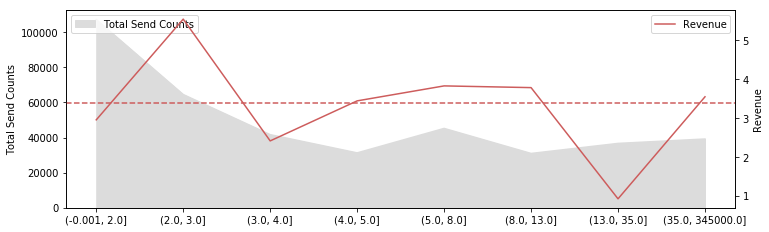

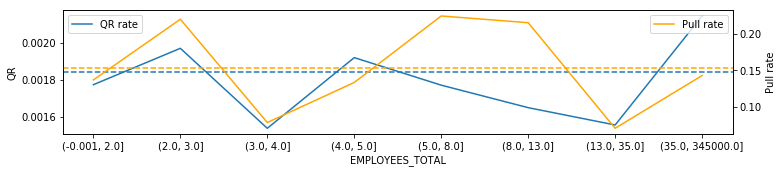

In [236]:
print(plot_table_n('EMPLOYEES_TOTAL')) 
table_n('EMPLOYEES_TOTAL')  

In [401]:
chi_test('ORGANIZATIONAL_STATUS_CODE')
chi_test('LEGAL_STATUS_CORPORATE_STRUCTU')
chi_test('PrimarySPECIALTY')
chi_test('POPULATION_CODE')
#chi_test('MedicalTitleGroup_r')   
#chi_test('ADDRESS_TYPE')
chi_test('FILING_STATEMENT_TYPE_CODE')
chi_test('VIABILITY_SCORE')      
chi_test('PUBLIC_FILINGS_INDICATOR')
chi_test('NON-PROFIT_INDICATOR')
chi_test('DELINQUENCY_PREDICTOR_CLASS_(CCS')
chi_test('PORTFOLIO_COMPARISON')
chi_test('DELIST_INDICATOR')
chi_test('OUT_OF_BUSINESS_INDICATOR')
chi_test('gender')

 chi_p_value is 0.0796  ------------------------------------------------
ORGANIZATIONAL_STATUS_CODE     0.0    1.0    2.0
Margin072018                                    
(-1076.749, 0.0]            297855  44465  53883
(0.0, 6767.892]                 43     10      2
(6767.892, 68168.19]            62     11      7
 chi_p_value is 0.002  ------------------------------------------------
LEGAL_STATUS_CORPORATE_STRUCTU    0.0     3.0    12.0   13.0
Margin072018                                                
(-1076.749, 0.0]                211157  116008  18148  50897
(0.0, 6767.892]                     25      12      9      9
(6767.892, 68168.19]                39      29      3      9
 chi_p_value is 0.0  ------------------------------------------------
PrimarySpecialty           0       1
Margin072018                        
(-1076.749, 0.0]      122434  273780
(0.0, 6767.892]           32      23
(6767.892, 68168.19]      32      48
 chi_p_value is 0.9265  --------------------------